# Explore Nightlights Catalog on AWS ASDI 

> check files download via aws cli 

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
# %%bash
# pip install awscli
# aws --version
# mkdir -p ../data/ntlights
# mkdir -p ../data/ntlights-bigfiles
# touch ../data/.gitignore
# echo 'ntlights-bigfiles/' >> ../data/.gitignore
# %cd ../data/ntlights
# # aws s3 ls --no-sign-request s3://globalnightlight/
# aws s3 ls --no-sign-request s3://globalnightlight/ > globalnightlight.txt
# aws s3 cp --no-sign-request s3://globalnightlight/catalog.json .
# aws s3 cp --no-sign-request s3://globalnightlight/DMSP_catalog.json .
# aws s3 cp --no-sign-request s3://globalnightlight/VIIRS_npp_catalog.json .
# aws s3 cp --no-sign-request s3://globalnightlight/npp_201809/npp_201809_catalog.json .
# # aws s3 ls --no-sign-request s3://globalnightlight/npp_201809/
# aws s3 ls --no-sign-request s3://globalnightlight/npp_201809/ > npp_201809-catalog.txt
# cat npp_201809-catalog.txt | grep 'd20180912_' > npp_20180912-catalog.txt
# cat npp_20180912-catalog.txt | grep '.rade9.co.tif' > npp_20180912-rade9-co-tif-catalog.txt
# cat npp_20180912-catalog.txt | grep '.vflag.co.tif' > npp_20180912-vflag-co-tif-catalog.txt
# cat npp_20180912-catalog.txt | grep '.rade9.co.json' > npp_20180912-rade9-co-json-catalog.txt
# %cd ../ntlights-bigfiles
# aws s3 cp --no-sign-request s3://globalnightlight/npp_201809/SVDNB_npp_d20180912_t0054399_e0100203_b35620_c20180912050020810366_nobc_ops.rade9.co.tif .
# aws s3 cp --no-sign-request s3://globalnightlight/npp_201809/SVDNB_npp_d20180912_t1126148_e1131551_b35626_c20180912153156535102_nobc_ops.rade9.co.tif .
# aws s3 cp --no-sign-request s3://globalnightlight/npp_201809/SVDNB_npp_d20180912_t0003271_e0009075_b35619_c20180912040907984373_nobc_ops.rade9.co.json .
# %cd ../../nbs

In [ ]:
!ls ../data/ntlights/*.txt

../data/ntlights/asdi-globalnightlight-catalog.txt
../data/ntlights/npp_201809-catalog.txt
../data/ntlights/npp_20180912-catalog.txt
../data/ntlights/npp_20180912-rade9-co-json-catalog.txt
../data/ntlights/npp_20180912-rade9-co-tif-catalog.txt
../data/ntlights/npp_20180912-vflag-co-tif-catalog.txt


In [ ]:
!ls ../data/ntlights/*.json

../data/ntlights/DMSP_catalog.json
../data/ntlights/SVDNB_npp_d20180912_t0003271_e0009075_b35619_c20180912040907984373_nobc_ops.rade9.co.json
../data/ntlights/VIIRS_npp_catalog.json
../data/ntlights/catalog.json
../data/ntlights/npp_201809_catalog.json


In [ ]:
item_path = '../data/ntlights/SVDNB_npp_d20180912_t0003271_e0009075_b35619_c20180912040907984373_nobc_ops.rade9.co.json'

In [ ]:
import json

In [ ]:
with open(item_path,'r') as f:
    item = json.load(f)

In [ ]:
item

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'SVDNB_npp_d20180912_t0003271_e0009075_b35619_c20180912040907984373_nobc_ops.rade9.co',
 'properties': {'datetime': '2018-09-12T00:03:27Z'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-111.00208333335, -64.99791669865],
    [-111.00208333335, -60.99791666665],
    [-93.00208318935, -60.99791666665],
    [-93.00208318935, -64.99791669865],
    [-111.00208333335, -64.99791669865]]]},
 'links': [{'rel': 'root',
   'href': './npp_201809_catalog.json',
   'type': 'application/json'},
  {'rel': 'parent',
   'href': './npp_201809_catalog.json',
   'type': 'application/json'}],
 'assets': {'image': {'href': 'https://globalnightlight.s3.amazonaws.com/npp_201809/SVDNB_npp_d20180912_t0003271_e0009075_b35619_c20180912040907984373_nobc_ops.rade9.co.tif',
   'type': 'image/tiff; application=geotiff; profile=cloud-optimized'}},
 'bbox': [-111.00208333335, -64.99791669865, -93.00208318935, -60.99791666665]}

In [ ]:
item['geometry']

{'type': 'Polygon',
 'coordinates': [[[-111.00208333335, -64.99791669865],
   [-111.00208333335, -60.99791666665],
   [-93.00208318935, -60.99791666665],
   [-93.00208318935, -64.99791669865],
   [-111.00208333335, -64.99791669865]]]}

In [ ]:
from shapely.geometry import Polygon 

In [ ]:
shape = Polygon(item['geometry']['coordinates'][0])

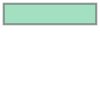

In [ ]:
shape

In [ ]:
import geopandas as gpd

In [ ]:
gdf = gpd.GeoDataFrame(
    data=dict(
        id=[item['id']],
        datetime=[item['properties']['datetime']],
        href=[item['assets']['image']['href']],
        geometry=[Polygon(item['geometry']['coordinates'][0])]),
    geometry='geometry',
    crs='EPSG:4326')

In [ ]:
gdf

,id,datetime,href,geometry
0,SVDNB_npp_d20180912_t0003271_e0009075_b35619_c...,2018-09-12T00:03:27Z,https://globalnightlight.s3.amazonaws.com/npp_...,"POLYGON ((-111.00208 -64.99792, -111.00208 -60..."
